In [66]:
!bash /home/azureuser/cloudfiles/code/blobfuse/blobfuse_raadsinformatie.sh

In [40]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 83.0 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.0/311.0 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 92.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 88.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Set-up paths - either AZURE or LOCAL 

In [67]:
import sys
sys.path.append("..")

# Select where to run notebook: "azure" or "local"
my_run = "azure"

import my_secrets as sc
import settings as st

if my_run == "azure":
    import config_azure as cf
elif my_run == "local":
    import config as cf

### Load data
Don't run this. Loading the data will take a long time. Later in the notebook, csv file is loaded

In [63]:
# import sys
# sys.path.append('../scripts/') 

# import pandas as pd
# from load_data import load_txt_files

# txtfile_paths = pd.read_csv("../data/txtfile_paths.csv")

# all_txt_df = load_txt_files(txtfile_paths, ['test'])

,label,path,id,set
0,Motie,/home/azureuser/cloudfiles/code/blobfuse/raads...,0,train
1,Motie,/home/azureuser/cloudfiles/code/blobfuse/raads...,1,train
2,Motie,/home/azureuser/cloudfiles/code/blobfuse/raads...,2,train
3,Motie,/home/azureuser/cloudfiles/code/blobfuse/raads...,3,train
4,Motie,/home/azureuser/cloudfiles/code/blobfuse/raads...,4,test
...,...,...,...,...
33123,Factsheets,/home/azureuser/cloudfiles/code/blobfuse/raads...,33123,train
33124,Factsheets,/home/azureuser/cloudfiles/code/blobfuse/raads...,33124,val
33125,Factsheets,/home/azureuser/cloudfiles/code/blobfuse/raads...,33125,train
33126,Factsheets,/home/azureuser/cloudfiles/code/blobfuse/raads...,33126,train


### Preprocessing steps

Missing data

In [ ]:
import numpy as np

missing_text = df[df['text'].str.len() < 5]
print(f"There are {len(missing_text)} documents that have less than 5 characters")

print(f"Removing the documents that could not be extracted or have less than 5 characters, leaves us with {len(df)-len(missing_text)} (out of {len(df)})")
df = df[df['text'].str.len() > 5]


token length

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')

df['tokens'] = df['text'].apply(word_tokenize)

def calculate_length(token_list):
    return len(token_list)

df['token_length'] = df['tokens'].apply(calculate_length)
display(df)
SAVED_DF = df.copy()

importing csv file where text is already extracted and tokens are already split

In [68]:
import ast
import pandas as pd
test_df = pd.read_csv("../data/test_txt_tokenization.csv", encoding='utf-8')
test_df['tokens'] = test_df['tokens'].apply(ast.literal_eval)
df = test_df.copy()
display(test_df)

,label,path,id,set,text,tokens,token_length
0,Motie,/home/azureuser/cloudfiles/code/blobfuse/raads...,4,test,x Gemeente Amsterdam R\nGemeenteraad\n\n% Geme...,"[x, Gemeente, Amsterdam, R, Gemeenteraad, %, G...",261
1,Motie,/home/azureuser/cloudfiles/code/blobfuse/raads...,6,test,X Gemeente Amsterdam R\nGemeenteraad\n% Gemeen...,"[X, Gemeente, Amsterdam, R, Gemeenteraad, %, G...",516
2,Motie,/home/azureuser/cloudfiles/code/blobfuse/raads...,7,test,X Gemeente Amsterdam R\nGemeenteraad\n% Gemeen...,"[X, Gemeente, Amsterdam, R, Gemeenteraad, %, G...",504
3,Motie,/home/azureuser/cloudfiles/code/blobfuse/raads...,18,test,X Gemeente Amsterdam R\nGemeenteraad\n% Gemeen...,"[X, Gemeente, Amsterdam, R, Gemeenteraad, %, G...",242
4,Motie,/home/azureuser/cloudfiles/code/blobfuse/raads...,22,test,X Gemeente Amsterdam R\nGemeenteraad\n% Gemeen...,"[X, Gemeente, Amsterdam, R, Gemeenteraad, %, G...",226
...,...,...,...,...,...,...,...
6619,Factsheets,/home/azureuser/cloudfiles/code/blobfuse/raads...,33104,test,2 Gemeente\nx EN Samen maken wij\n| li EN\n8 R...,"[2, Gemeente, x, EN, Samen, maken, wij, |, li,...",444
6620,Factsheets,/home/azureuser/cloudfiles/code/blobfuse/raads...,33106,test,|\nRN EE 8 Le Sl ma Alen I hak\nBin AA ND UIVE...,"[|, RN, EE, 8, Le, Sl, ma, Alen, I, hak, Bin, ...",5310
6621,Factsheets,/home/azureuser/cloudfiles/code/blobfuse/raads...,33109,test,|\nSociale Schouw: Holendrecht\n|\nDUIVENDRECH...,"[|, Sociale, Schouw, :, Holendrecht, |, DUIVEN...",4762
6622,Factsheets,/home/azureuser/cloudfiles/code/blobfuse/raads...,33120,test,Centraal in het onderzoek Wonen in Amsterdam s...,"[Centraal, in, het, onderzoek, Wonen, in, Amst...",5453


Do minimal cleaning: remove stopwords and interpunction

In [3]:
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')


# remove stopwords
top_df = df.copy()

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('dutch'))
    tokens_without_stopwords = [word for word in tokens if word.lower() not in stop_words]
    tokens_without_punctuation = [word for word in tokens_without_stopwords if word not in string.punctuation and len(word)>1]
    return tokens_without_punctuation


df['cleaned_tokens'] = df['tokens'].apply(remove_stopwords)
df['clean_text'] = df['cleaned_tokens'].apply(lambda x: ' '.join(x))



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### EDA
- Goal of the research: classify documents using LLMs
- The data consists of documents and their labels (classes). Besides the text from the pdfs there are no other features that will be used for the classification
- The EDA is performed on 20% of the dataset, because the dataset is very large (33000 docs).
- First de data is loaded in and some cleaning of the tokens is done. 
- Missing values, documents where no text was extracted from the PDFs are already removed.

In [ ]:
import ast
import pandas as pd
test_df = pd.read_csv("../data/test_txt_tokenization.csv", encoding='utf-8')
test_df['tokens'] = test_df['tokens'].apply(ast.literal_eval)
df = test_df.copy()
display(test_df)

In [69]:
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')


# remove stopwords
top_df = df.copy()

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('dutch'))
    tokens_without_stopwords = [word for word in tokens if word.lower() not in stop_words]
    tokens_without_punctuation = [word for word in tokens_without_stopwords if word not in string.punctuation and len(word)>1]
    return tokens_without_punctuation


df['cleaned_tokens'] = df['tokens'].apply(remove_stopwords)
df['clean_text'] = df['cleaned_tokens'].apply(lambda x: ' '.join(x))



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Token distribution
Below are the tables shown for the complete dataset and the classes.

We can see that the token counts within the classes and between the classes are varying. This could create difficulties when converting the docs into suitable input for the LLMs. The LLMs have a max token limit, meaning that whole documents cannot be given as input and thus the docs need to be represented in another way.
 
Note: the minimum values are very small. This is likely a result of mistakes made during converting PDF to OCR. Further expection is needed to remove bad files.

In [4]:
display(df['token_length'].describe())
class_describe = df.groupby('label')['token_length'].describe()
display(class_describe)

count      6624.000000
mean       2613.228261
std       12427.304393
min           3.000000
25%         291.000000
50%         539.500000
75%        1245.000000
max      258660.000000
Name: token_length, dtype: float64

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
Actualiteit,210.0,595.966667,755.620030,95.0,238.00,345.5,615.5,5664.0
Adviesaanvraag,483.0,1846.877847,4470.726367,87.0,574.50,973.0,1687.0,77769.0
Agenda,707.0,1258.444130,5525.753546,34.0,314.00,638.0,980.0,130125.0
Amendement,399.0,2501.699248,6312.419313,66.0,224.50,346.0,1058.0,45588.0
Begroting,388.0,11663.860825,41781.577162,42.0,239.75,416.5,2351.5,247184.0
Besluit,137.0,1005.956204,1479.950704,78.0,188.00,507.0,1385.0,12651.0
Brief,391.0,1897.092072,1475.626486,3.0,792.00,1382.0,2710.0,7753.0
Factsheets,57.0,5531.807018,8870.838287,168.0,1160.00,3388.0,5453.0,44116.0
Motie,1677.0,550.029219,1286.638347,130.0,234.00,296.0,411.0,25298.0


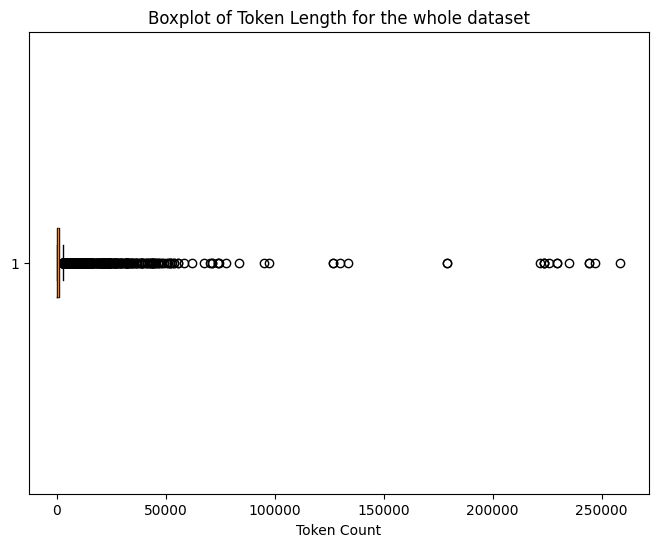

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df['token_length'], vert=False)
plt.title('Boxplot of Token Length for the whole dataset')
plt.xlabel('Token Count')
plt.show()

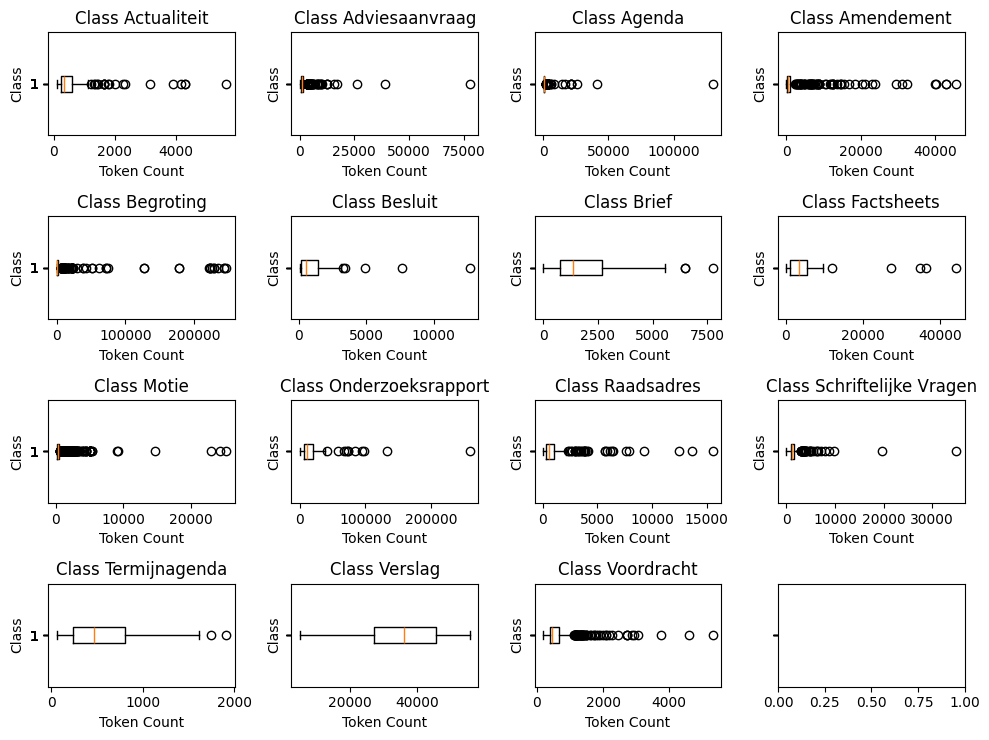

In [99]:
grouped = df.groupby('label')

# Create subplots
fig, axs = plt.subplots(4, 4, figsize=(10, 7.5), sharey=True)

# Iterate over groups and plot boxplots
for i, (label, group) in enumerate(grouped):
    row = i // 4
    col = i % 4
    axs[row, col].boxplot(group['token_length'], vert=False)
    axs[row, col].set_title(f'Class {label}')
    axs[row, col].set_xlabel('Token Count')
    axs[row, col].set_ylabel('Class')

# Hide empty subplots if any
for i in range(len(grouped), 3*5):
    row = i // 5
    col = i % 5
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

Based on the plots above we can see that there a classes that dont have (many) outliers in token counts, such as termijnagenda, verslag and brief. On the other hand there are also classes that have many outliers in token count, such as voordracht, begroting and moties. 

#### Top words for each class

The goal is to find words that are identifiers for the classes. We suspect that the name of the class, for example 'agenda', 'motie', 'begroting', will be strong identicators for a class. However, we also know that these words are used in documents that don't belong to that class. The goal of this part of the analysis is to find how severe this is. 

1. select top 50 words with highest TF-IDF mean for each class. 

2. Then select the unique words for each class. Words that do not occur in the top-50 of other classes.

3. Check if other class names are named in docs of a class.

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df['label'] = df['label']

# Calculate mean TF-IDF score for each word across all documents in each class
mean_tfidf_by_class = tfidf_df.groupby('label').mean()

# Get top 50 words with highest mean TF-IDF score for each class
top_50_words = {}
for class_name, class_tfidf in mean_tfidf_by_class.iterrows():
    top_50_words[class_name] = class_tfidf.nlargest(50).index.tolist()

In [27]:
unique_words_dict = {}
for class_name in top_50_words.keys():
    top_words = top_50_words[class_name]

    all_other_words = []
    for other_name in top_50_words.keys():
        if class_name != other_name:
            all_other_words.extend(top_50_words[other_name])
    all_other_words = set(all_other_words)

    unique_words = [word for word in top_words if word not in all_other_words]
    print(f'{class_name}: ---- {unique_words}')




Actualiteit: ---- ['actualiteit', 'spoedeisendheid', 'reden', 'raadsactualiteit', 'behandeling', 'raadsvergadering', 'juli', 'maart', 'juni', 'supplement', 'dantzig']
Adviesaanvraag: ---- ['stadsdeelcommissie', 'adviesaanvraag', 'art', 'concept', 'stadsdelen', 'staf', 'invullen', '2605', '81484', 'z17', 'adviezen', 'verordening', 'sdc', 'kaders', 'meegestuurde', 'weekstart', 'directie', 'kader', 'procesbegeleider', 'formuleer', 'vraagt', 'optioneel', 'conceptadvies']
Agenda: ---- ['agendapunten', 'bd2013', 'aanvang', 'dient', 'hierbij']
Amendement: ---- ['stadsdeelraad', 'deelraad', 'groenlinks', 'bijeen', 'gl', 'ingediend', 'dag', 'voorstel', 'amendementen']
Begroting: ---- ['2010', '2009', '2008', 'miljoen', '2007', 'december', 'lasten', 'baten', 'reserve', 'reserves', 'euro', 'kosten', 'saldo', 'financiële', 'behandelen', 'middelen']
Besluit: ---- ['algemeen', 'ab', 'int', 'bestemmingsplan', 'decos', 'nieuwwest', 'ivar', 'baâdoud', '1064', 'ontwerpbestemmingsplan', '14020', '2003', 

In [65]:

# get dict with all tokens (including duplicates) for each class
tokens_class = dict()
for class_name in set(df['label']):
    all_tokens = list(df.loc[df['label']==class_name]['cleaned_tokens'].values)
    all_tokens = [token for sublist in all_tokens for token in sublist]
    tokens_class[class_name] = all_tokens

# For each class count how many times the class names are in the tokens
df_col = list(tokens_class.keys())
df_col.append("Total Doc in Class")
class_count_df = pd.DataFrame(columns=df_col)

for class_name in tokens_class.keys():
    tokens = tokens_class[class_name]
    counts = {label: tokens.count(label.lower()) for label in tokens_class.keys()}
    counts['Total Doc in Class'] = len(df.loc[df['label']==class_name])
    class_count_df.loc[len(class_count_df)] = counts

class_count_df.set_index(pd.Index(list(tokens_class.keys())), inplace=True)


# high the df to make result more interpretable
def highlight_max_and_second_highest_except_total(s):
    max_val = s[:-1].max()
    second_max_val = s[:-1].nlargest(2).iloc[-1]  # Get the second largest value
    is_max = s[:-1] == max_val
    is_max['Total Doc in Class'] = False
    is_second_max = s[:-1] == second_max_val
    is_second_max['Total Doc in Class'] = False

    styles = ['background-color: green' if v else '' for v in is_max]
    styles_second = ['background-color: orange' if v else '' for v in is_second_max]
    combined_styles = [f'{styles[i]}; {styles_second[i]}' for i in range(len(styles))]
    return combined_styles

styled_df = class_count_df.style.apply(highlight_max_and_second_highest_except_total, axis=1)

display(styled_df)




,Agenda,Termijnagenda,Verslag,Motie,Brief,Besluit,Raadsadres,Actualiteit,Begroting,Onderzoeksrapport,Schriftelijke Vragen,Amendement,Adviesaanvraag,Factsheets,Voordracht,Total Doc in Class
Agenda,2149,47,74,688,768,133,892,23,434,7,0,20,21,0,28,707
Termijnagenda,484,52,29,49,19,14,16,0,15,0,0,1,17,0,2,203
Verslag,254,7,18,5343,913,710,598,102,572,4,0,592,4,0,992,56
Motie,66,14,19,1600,360,168,14,93,412,4,0,40,0,1,142,1677
Brief,37,4,23,512,676,258,2,6,122,11,0,36,9,0,13,391
Besluit,11,0,3,14,62,389,0,2,72,0,0,10,12,0,39,137
Raadsadres,24,0,16,30,439,142,329,3,37,0,0,1,0,0,12,397
Actualiteit,74,0,8,97,180,61,106,150,18,3,0,0,3,0,20,210
Begroting,251,3,27,776,148,614,1,30,7240,7,0,171,34,0,74,388
Onderzoeksrapport,198,0,61,91,90,310,0,13,336,14,0,6,5,4,18,233


The green marked values are the highest count in that row and the orange ones are the second highest.

- Agenda: The class name "Agenda" is named the most often, which is good. However, the other classnames are also named quite often.
- Termijnagenda: the class name 'Agenda' is named most often, which isnt that good. Termijnagenda is not named that often compared to 'agenda'. This might be a problem. And the classes probably need to be combined.
- Verslag: The class name 'verslag' is names very sparsely. Motie is named VERY often, as are other classes.
- Motie: The class name 'Motie' is named most often. The others are named not that often. 
- Brief: The class name 'Motie' is named most often. However, 'Motie' is also named quite often, as well as 'Brief'.



### Similarity within class

If the docs within a class are similar, it will be easier to classify them, because then patterns are easier to identify by the model. The average cosine similarity between docs of a class is calculated. Since the texts need to be shortened to give as input, the similarity of the first 1000 tokens of each doc is also compared.

We can see in the tables below the similarity of the documents within the classes. It shows that the documents are not similar to each other, since the scores are low. 
Verslag is the class with the highest similarity between the documents. Additionally, the documents are more similar if the whole document is compared, than when the first 1000 tokens of the docs are compared. This could be a problem, or at least worse the performance if the docs are represented by the first N tokens. This could mean that other representation methods such as summarizing might be a better fit to represent the docs.


In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import math


def similarity_within_class(input_df, text_len):
    work_df = input_df.copy()
    within_sim = pd.DataFrame(columns=['label', 'average_sim', 'num_pairs_exceeding_threshold'])

    # if not complete
    if text_len == 'complete':
        text_column = 'text'

    else:
        work_df['short_text'] = work_df['tokens'].apply(lambda tokens: ' '.join(tokens[:text_len]))
        text_column = 'short_text'


    for category in set(work_df['label']):
        subdf = work_df.loc[work_df['label']==category]

        # get tf-idf score
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform(subdf[text_column])

        # calculate cosine similarity
        cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

        # take average sim
        average_similarity = round(np.mean(cosine_similarities), 2)

        # calculate how many pairs succeed threshold
        total_possible_pairs = len(cosine_similarities) * (len(cosine_similarities))
        num_pairs_exceeding_threshold = round(np.sum(cosine_similarities > 0.5) / total_possible_pairs, 2)

        # add to df
        within_sim.loc[len(within_sim)] = {'label':category, 'average_sim': average_similarity, 'num_pairs_exceeding_threshold':num_pairs_exceeding_threshold}

        within_sim = within_sim.sort_values(by='average_sim', ascending=False)
    return within_sim

# sim_within_df_500tokens = similarity_within_class(df, 500)
# display(sim_within_df_500tokens)

sim_within_df_1000tokens = similarity_within_class(df, 1000)
display(sim_within_df_1000tokens)

sim_within_df_cleantext = similarity_within_class(df, 'complete')
display(sim_within_df_cleantext)


,label,average_sim,num_pairs_exceeding_threshold
11,Verslag,0.53,0.41
9,Adviesaanvraag,0.30,0.01
3,Brief,0.29,0.01
6,Schriftelijke Vragen,0.28,0.00
14,Agenda,0.25,0.05
12,Besluit,0.24,0.02
4,Termijnagenda,0.21,0.07
13,Onderzoeksrapport,0.21,0.01
2,Actualiteit,0.20,0.01
7,Factsheets,0.20,0.03


,label,average_sim,num_pairs_exceeding_threshold
11,Verslag,0.89,1.00
13,Onderzoeksrapport,0.51,0.55
3,Brief,0.37,0.11
9,Adviesaanvraag,0.36,0.08
6,Schriftelijke Vragen,0.33,0.02
5,Begroting,0.30,0.09
7,Factsheets,0.28,0.10
12,Besluit,0.27,0.05
14,Agenda,0.27,0.06
1,Amendement,0.23,0.04


## Code to extract text from PDF

In [82]:
pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB 9.3 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os

print(f"There are {len(os.listdir(cf.folder_path_annotated))} subfolders in the rootfolder")

total_count = 0

for folder in os.listdir(cf.folder_path_annotated):
    if folder != '.keep':
        total_count += len(os.listdir(cf.folder_path_annotated+folder))
print(f"There are in total {total_count} files in the rootfolder")

There are 28 subfolders in the rootfolder
There are in total 163 files in the rootfolder


In [4]:
import os
import random
import pandas as pd
from PyPDF2 import PdfReader
from collections import defaultdict

# Function to extract text from PDF and get page count
def extract_text_and_count_from_pdf(pdf_path):
    try: 
        text = ""
        page_count = 0
        with open(pdf_path, 'rb') as f:
            reader = PdfReader(f)
            page_count = len(reader.pages)
            for page in reader.pages:
                text += page.extract_text()
        return text, page_count
    
    except Exception as e:
        print(f"Error extracting text from {pdf_path}: {e}")
        return '', 0


def create_df_from_pdfs(root_folder):
    data = []
    
    # each folder in the rootfolder contains PDFs for one class
    for doc_class in os.listdir(root_folder):

        # there was a weird folder
        if doc_class != '.keep':

            # for every PDF in a folder, save the class, extract the text and count the pages
            for pdf in  os.listdir(root_folder+doc_class):

                # make sure only pdf files are extracted
                if pdf.endswith('.pdf') and len(pdf)>0:
                    pdf_path = root_folder+doc_class+'/'+pdf
                    pdf_text, pdf_page_count = extract_text_and_count_from_pdf(pdf_path)

                    data.append({'filename':pdf, 'text':pdf_text, 'class':doc_class, 'number_pages':pdf_page_count})
    df = pd.DataFrame(data)
    return df
df = create_df_from_pdfs(cf.folder_path_annotated)
display(df)


ImportError: C extension: None not built. If you want to import pandas from the source directory, you may need to run 'python setup.py build_ext' to build the C extensions first.

### Display DF

In [4]:
import pandas as pd
df = pd.read_csv(cf.file_path_annotated_csv)
display(df.head())

,filename,text,class,number_pages
0,A - 06 Algemene Zaken (1) 03_Proces_Nieuwe MRA...,\n \n \nAanleiding \nIn dit memo is op hoof...,Memo,9
1,A - 03 Democratisering (inclusief Bestuurlijk ...,1 Delegatie en mandaat van raadsbevoegdheden ...,Advies,26
2,A - 04 Ruimtelijke Ordening (23) 4a_ Advies DB...,Pagina 1 van 3Adviesaanvraag college aan dage...,Advies,3
3,A - 04 Ruimtelijke Ordening (23) 4b_ Advies co...,Pagina 1 van 4 \n Adviesaanvraag college a...,Advies,4
4,A - 04 Ruimtelijke Ordening (23) 4c_ Advies DB...,Pagina 1 van 3Adviesaanvraag college aan dage...,Advies,3


### Missing data
- empty text 
- zero pages -> those are the files that gave an error when trying to extract text from them.

In [5]:
import numpy as np

missing = df.loc[df['number_pages'] == 0]
print(f"There are {len(missing)} PDF files that gave an error while extracting the text.")

missing_text = df[df['text'].str.len() < 5]
print(f"There are {len(missing_text)} documents that have less than 5 characters")

print(f"Removing the documents that could not be extracted or have less than 5 characters, leaves us with {len(df) - len(missing)-len(missing_text)} (out of {len(df)})")
df = df.loc[df['number_pages'] != 0]
df = df[df['text'].str.len() > 5]


There are 2 PDF files that gave an error while extracting the text.
There are 0 documents that have less than 5 characters
Removing the documents that could not be extracted or have less than 5 characters, leaves us with 161 (out of 163)


### Basic Statistics

- Counts, class distribution
- Length distribution
- Number of unique words

**CREATE DATAFRAME FOR PAGE DISTRIBUTION**

The cell below shows code for the amount of pages distribution for the whole dataset and for each class. 

,class,Min_Pages,Max_Pages,Mean_Pages,Mode_Pages,Document_Count
0,WholeDataset,1,416,14.212500,2,160
1,Actualiteit,1,2,1.333333,1,3
2,Advies,2,26,6.375000,3,8
3,Adviesaanvraag,2,3,2.666667,3,3
4,Agenda,1,8,3.833333,3,6
5,Agendaplanning,2,3,2.500000,2,2
6,Amendement,2,2,2.000000,2,3
7,Artikel,2,139,30.600000,2,5
8,Begroting,51,51,51.000000,51,1
9,Besluit,1,14,4.384615,3,13


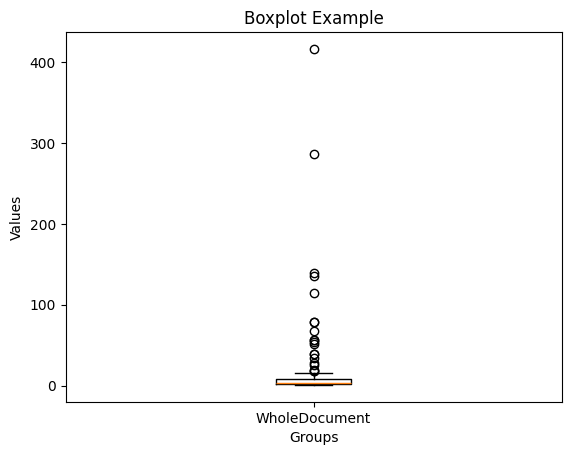

In [23]:
from collections import Counter
from statistics import mean, mode

"""CREATE DATAFRAME FOR PAGE DISTRIBUTION"""

# For each class
class_stats = df.groupby('class')['number_pages'].agg(['min', 'max', 'mean', lambda x: x.mode()[0], 'count'])
class_stats.columns = ['Min_Pages', 'Max_Pages', 'Mean_Pages', 'Mode_Pages', 'Document_Count']
class_stats.reset_index(inplace=True)

# For the whole dataste
new_row = {'class':'WholeDataset', 'Min_Pages':min(class_stats['Min_Pages']), 'Max_Pages': max(class_stats['Max_Pages']), 
           "Mean_Pages": mean(df['number_pages']), 'Mode_Pages': mode(df['number_pages']), 'Document_Count':len(df)}
df_stats = pd.DataFrame(new_row, index=[0])
class_stats = pd.concat([df_stats, class_stats])
class_stats.reset_index(inplace=True)

# Combine dfs
stats = class_stats.drop(columns=['index'])
display(stats)

"""CREATE BOXPLOT FOR PAGES LENGTHS"""
import matplotlib.pyplot as plt

plt.boxplot(df['number_pages'], labels=['WholeDocument'])

# Adding title and labels
plt.title('Boxplot Example')
plt.xlabel('Groups')
plt.ylabel('Values')

# Showing plot
plt.show()


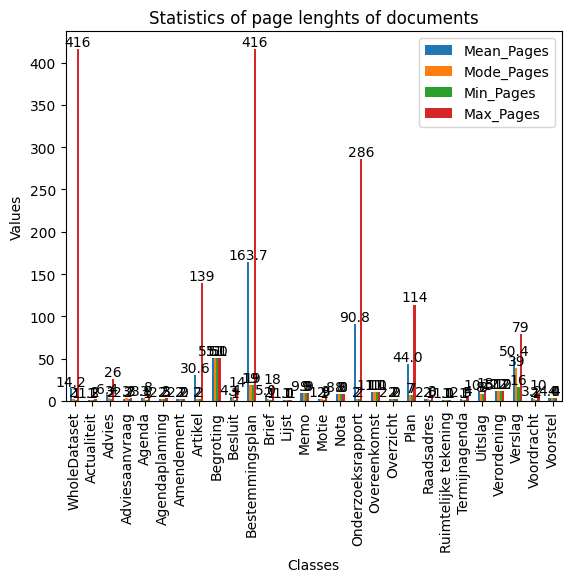

<Figure size 2500x600 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt 

ax = stats.plot(x="class", y=["Mean_Pages", "Mode_Pages", 'Min_Pages', "Max_Pages"], kind="bar") 
# ax = stats.plot(x="class", y=["Mean_Pages"], kind="bar") 

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 1)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Adding labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Values')
ax.set_title('Statistics of page lenghts of documents')

plt.figure(figsize=(25,6))
plt.show()


### Similarity WITHIN a class

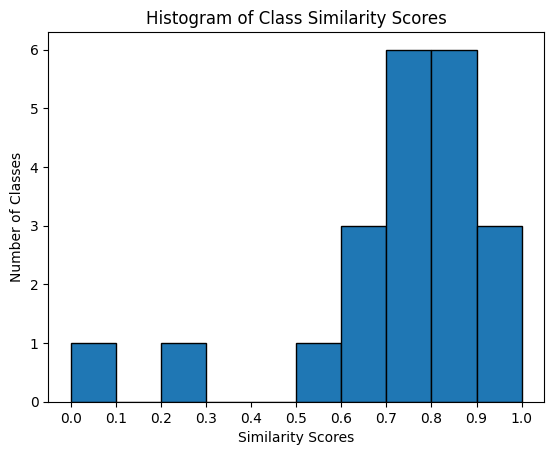

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store similarity scores for each class
class_similarity = {'WholeDataset':np.nan}

# Group the DataFrame by class
grouped = df.groupby('class')

# Iterate over each class
for class_name, group in grouped:
    # Tokenize the text for documents in the class
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(group['text'])
    
    # Compute pairwise cosine similarity between documents
    similarity_matrix = cosine_similarity(X)
    
    # Compute the average similarity score for the class
    similarity_scores = []
    for i, j in combinations(range(len(group)), 2):
        similarity_scores.append(similarity_matrix[i, j])

    # cant calculate similarity for classes with 1 document
    if len(similarity_scores) > 0:
        avg_similarity = sum(similarity_scores) / len(similarity_scores)
        class_similarity[class_name] = avg_similarity
    else:
        class_similarity[class_name] = np.nan

stats['class_similarity'] = class_similarity.values()

bins = np.arange(0, 1.1, 0.1)

# Create the histogram
plt.hist(stats.iloc[1:]['class_similarity'], bins=bins, edgecolor='black')

# Add labels and title
plt.xlabel('Similarity Scores')
plt.ylabel('Number of Classes')
plt.title('Histogram of Class Similarity Scores')
plt.xticks(np.arange(0, 1.1, 0.1)) 

# Show plot
plt.show()





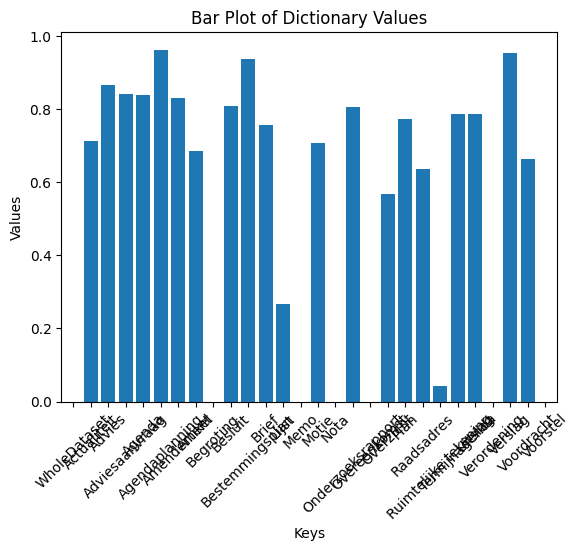

In [43]:

keys = list(class_similarity.keys())
values = list(class_similarity.values())

# Plot bar plot
plt.bar(keys, values)
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Bar Plot of Dictionary Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [35]:
print(class_similarity)

{'Actualiteit': 0.7132208687200694, 'Advies': 0.8661525301300504, 'Adviesaanvraag': 0.8420850736304262, 'Agenda': 0.8379293893462135, 'Agendaplanning': 0.962930810857555, 'Amendement': 0.8312726654222452, 'Artikel': 0.6860096369733448, 'Besluit': 0.8080796710685713, 'Bestemmingsplan': 0.937587783296364, 'Brief': 0.7561284777071262, 'Lijst': 0.26777240800208874, 'Motie': 0.7067409213771989, 'Onderzoeksrapport': 0.8062121288924066, 'Overzicht': 0.569232739422041, 'Plan': 0.7740532952087466, 'Raadsadres': 0.6369468315392182, 'Ruimtelijke tekening': 0.04268017050505208, 'Termijnagenda': 0.7867804554555011, 'Uitslag': 0.7876611756229989, 'Verslag': 0.952313286798887, 'Voordracht': 0.6648709996211685}


In [27]:
%pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 99.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.5/38.5 MB 34.0 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.
